In [3]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import math
import cv2
from google.colab.files import upload

In [4]:
upload()

Saving coin.jpg to coin.jpg


{'coin.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x10\x88Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01;\x00\x02\x00\x00\x00\x07\x00\x00\x08J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08R\x9c\x9d\x00\x01\x00\x00\x00\x0e\x00\x00\x10r\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

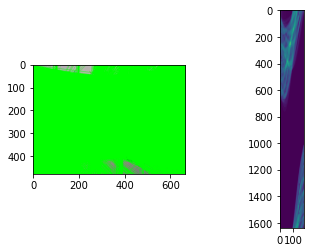

In [8]:
def hough_line(edge):
    theta = np.arange(0, 180, 1)
    cos = np.cos(np.deg2rad(theta))
    sin = np.sin(np.deg2rad(theta))
    rho_range = round(math.sqrt(edge.shape[0]**2 + edge.shape[1]**2))
    accumulator = np.zeros((2 * rho_range, len(theta)), dtype=np.uint8)
    edge_pixels = np.where(edge == 255)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))
    for p in range(len(coordinates)):
        for t in range(len(theta)):
            rho = int(round(coordinates[p][1] * cos[t] + coordinates[p][0] * sin[t]))
            accumulator[rho, t] += 2 
    return accumulator
    
if __name__ == '__main__':
    image = cv2.imread("coin.jpg")
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(grayscale,50,150)
    accumulator = hough_line(edges)
    edge_pixels = np.where(accumulator > 110)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    for i in range(0, len(coordinates)):
        a = np.cos(np.deg2rad(coordinates[i][1]))
        b = np.sin(np.deg2rad(coordinates[i][1]))
        x0 = a*coordinates[i][0]
        y0 = b*coordinates[i][0]
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),1)

    plt.subplot(121), plt.imshow(image)
    plt.subplot(122), plt.imshow(accumulator)
    plt.show()

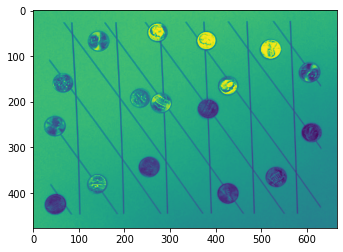

In [7]:
plt.imshow(grayscale)